In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 20

# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [2]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [3]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/technology/'
ex_dir = '../../data/processed/external/schmoch/'
output_dir = '../../output/'


In [4]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM
# top_p_or_num = ('num', 300)

color_list = initial_condition.COLOR_LIST

In [5]:
period_order_dict = {f'{period_start}-{period_start+year_range-1}': i for i, period_start in enumerate(range(year_start, year_end+1, year_range))} 
period_order_dict[f'{year_start}-{year_end}'] = len(period_order_dict)
period_order_dict

{'1981-1990': 0, '1991-2000': 1, '2001-2010': 2, '1981-2010': 3}

In [6]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv', 
                 sep=',')
schmoch_df = pd.read_csv(f'{ex_dir}35.csv', 
                         encoding='utf-8', 
                         sep=',', 
                         usecols=['Field_number', 'Field_en']
                         ).drop_duplicates()
df = pd.merge(df, schmoch_df, left_on=classification, 
              right_on='Field_number', how='left').drop(columns=['Field_number', classification])\
    .rename(columns={'Field_en': classification})
df = df.sort_values(f'{ar}_{year_style}_period', key=lambda col: col.map(period_order_dict))
       
df


FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/internal/technology/app_nendo_p_3.csv'

c:\Users\rin\anaconda3\envs\economic_complexity\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


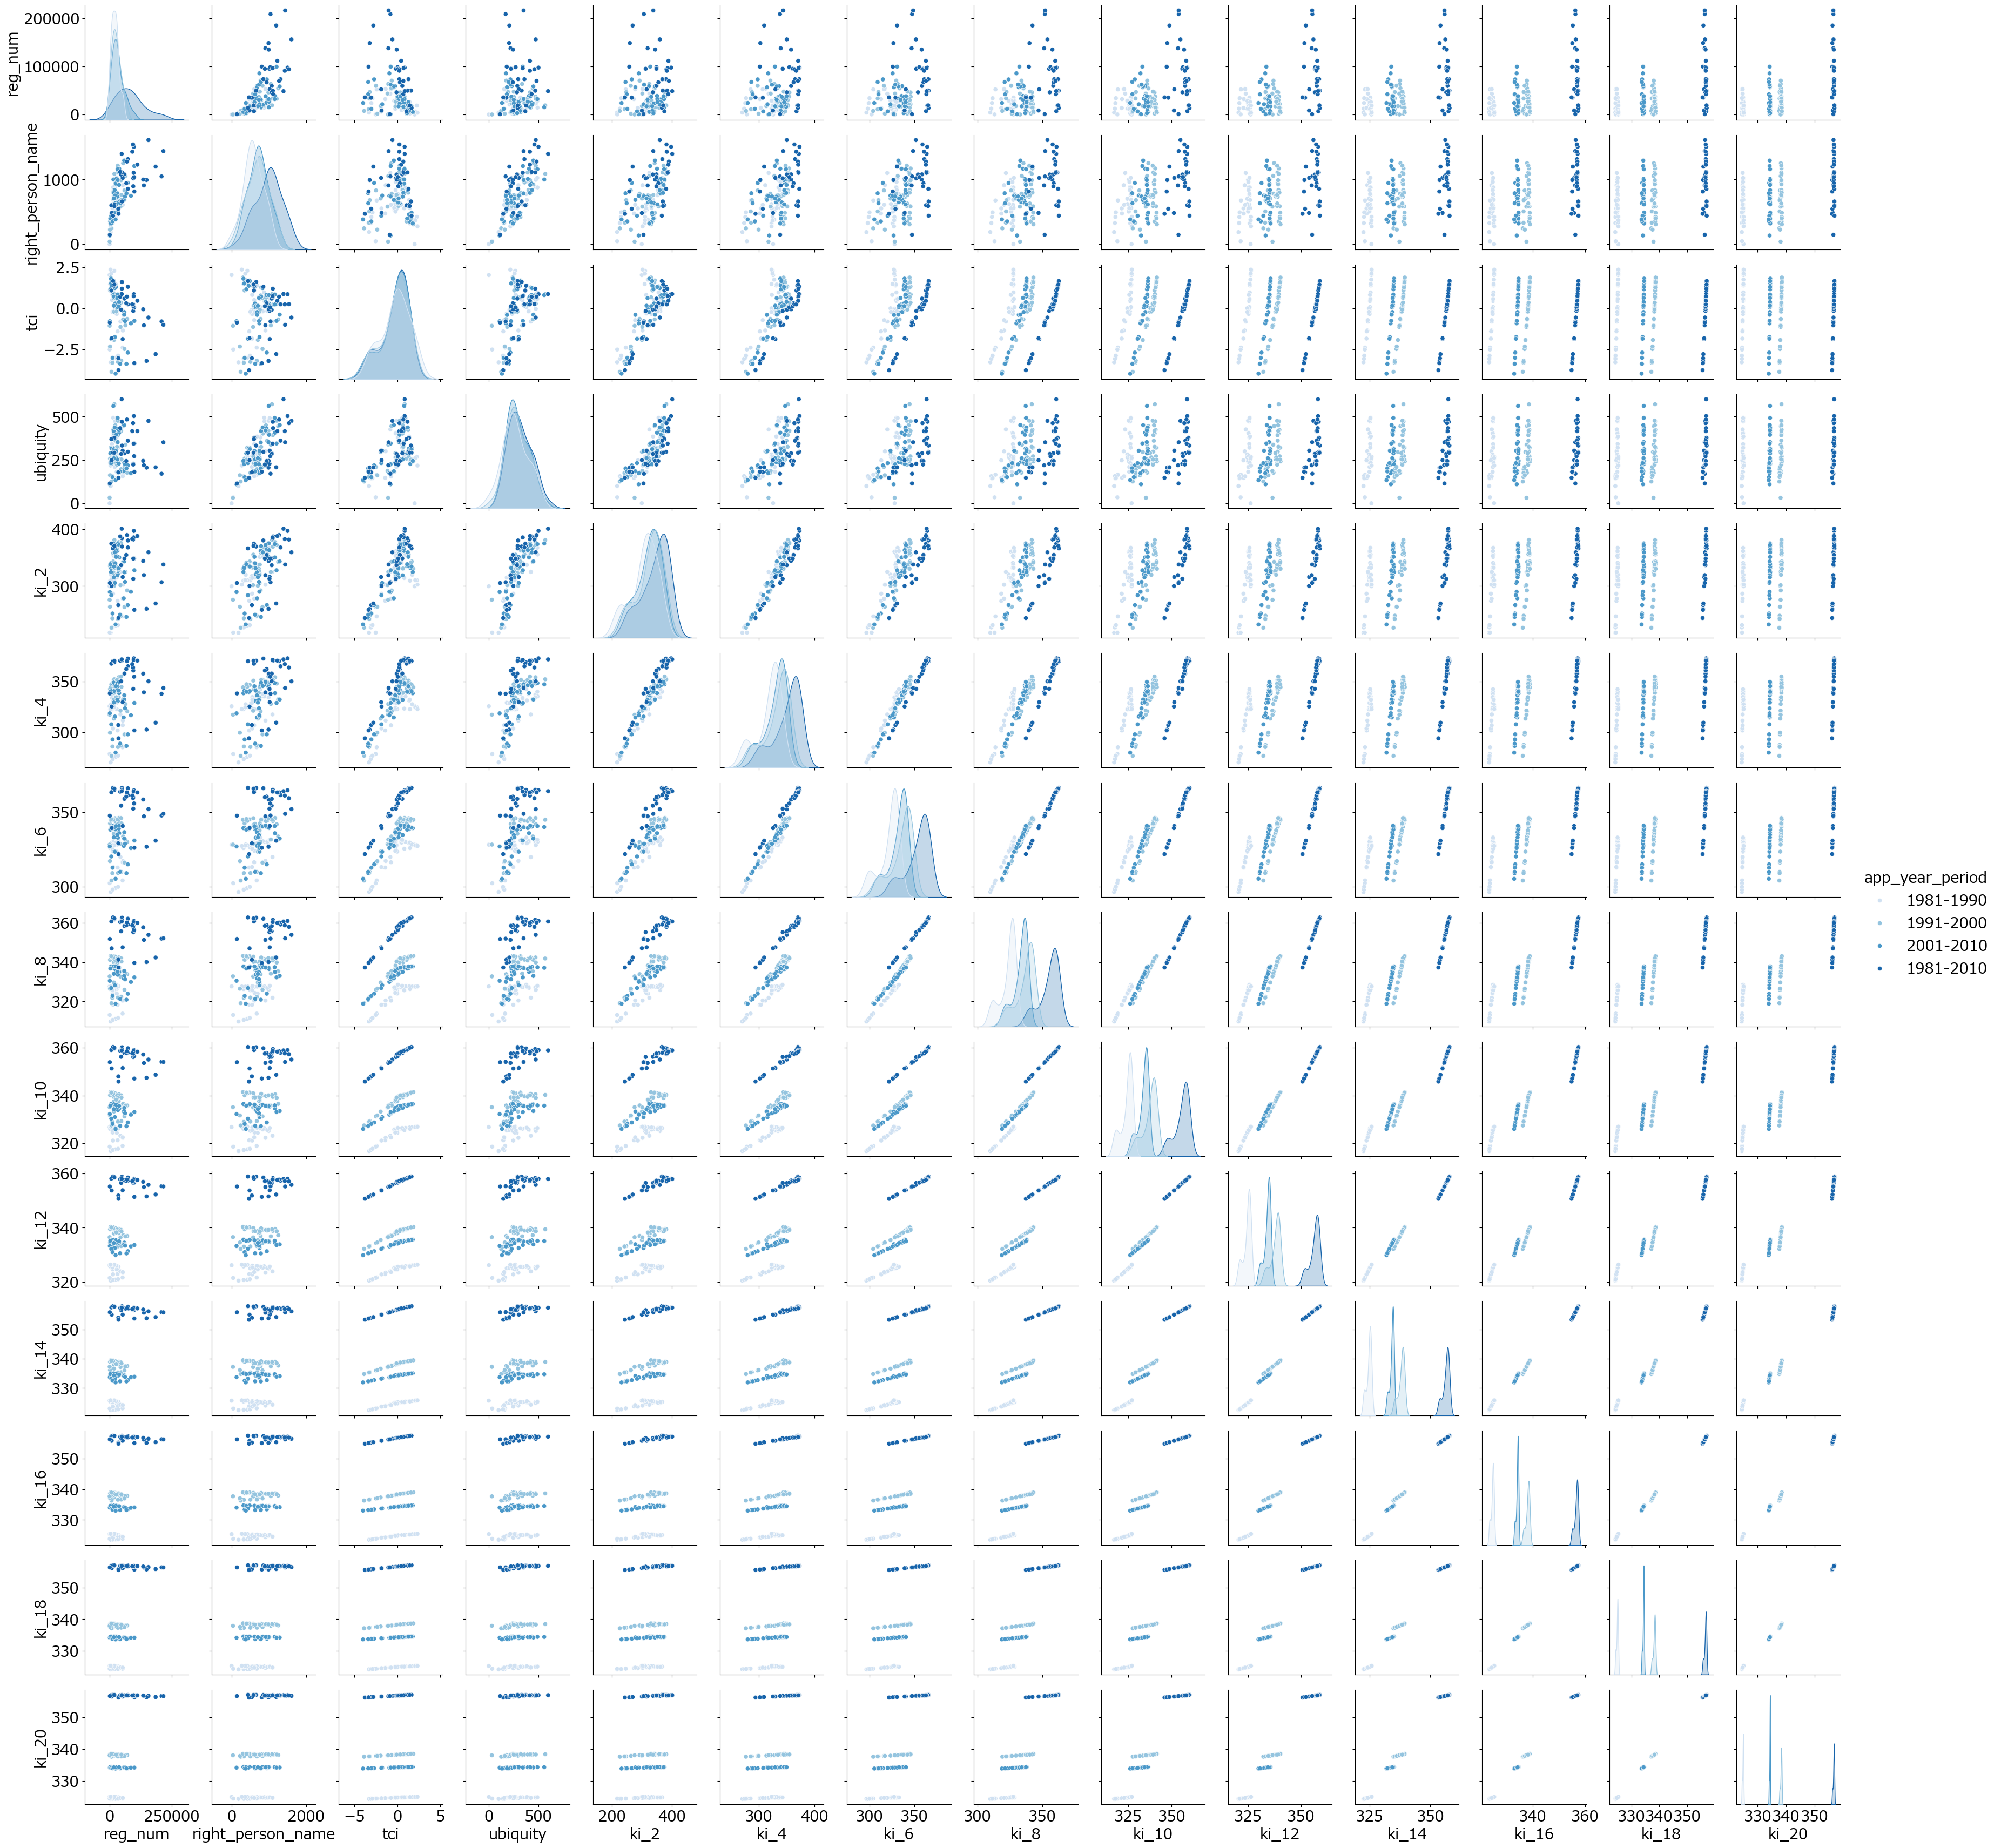

In [ ]:
pg = sns.pairplot(df[[f'{ar}_{year_style}_period', classification, 'reg_num', 'right_person_name', 'tci', 'ubiquity']+[f'ki_{i}' for i in range(2, 20+1, 2)]], 
                  hue=f'{ar}_{year_style}_period', palette='Blues')
pg

In [ ]:
df[df['schmoch35'].isin(['Analysis of biological materials',
                        'Organic fine chemistry',
                        'Biotechnology',
                        'Pharmaceuticals',
                        'Macromolecular chemistry, polymers',
                        'Food chemistry',
                        'Basic materials chemistry',
                        'Materials, metallurgy',
                        'Surface technology, coating',
                        'Chemical engineering',
                        'Other special machines'])&(df[f'{ar}_{year_style}_period']=='1981-2010')]

app_year_period                           schmoch35   reg_num  \
49       1981-2010                       Biotechnology 18705.417   
48       1981-2010              Organic fine chemistry 49719.293   
45       1981-2010    Analysis of biological materials  6877.317   
50       1981-2010                     Pharmaceuticals 13663.633   
51       1981-2010  Macromolecular chemistry, polymers 73506.540   
53       1981-2010           Basic materials chemistry 49545.462   
63       1981-2010              Other special machines 97554.104   
52       1981-2010                      Food chemistry 19087.025   
57       1981-2010                Chemical engineering 48567.232   
55       1981-2010         Surface technology, coating 69831.193   
54       1981-2010               Materials, metallurgy 96515.604   

    right_person_name   tci  ubiquity    ki_2    ki_4    ki_6    ki_8   ki_10  \
49                609 1.375       378 371.834 369.121 364.933 361.758 359.714   
48                661 1.605       333 369.649 370.669 366.262 362.612 360.227   
45                602 1.084       370 374.670 367.709 363.382 360.703 359.067   
50                440 1.664       292 366.312 370.208 366.298 362.726 360.323   
51                855 1.311       297 380.236 372.734 366.044 362.081 359.794   
53               1110 1.192       470 384.068 371.108 365.025 361.512 359.475   
63               1506 0.860       503 397.080 373.001 364.677 360.932 359.022   
52                590 1.448       292 370.772 370.553 365.787 362.230 359.975   
57               1396 0.870       600 400.895 371.951 364.072 360.664 358.905   
55               1278 0.707       483 389.737 370.287 363.271 360.120 358.554   
54               1104 0.737       344 385.709 371.356 363.826 360.367 358.671   

     ki_12   ki_14   ki_16   ki_18   ki_20  
49 358.472 357.736 357.307 357.059 356.916  
48 358.772 357.911 357.408 357.117 356.950  
45 358.089 357.514 357.179 356.985 356.874  
50 358.838 357.952 357.433 357.131 356.958  
51 358.480 357.727 357.296 357.051 356.911  
53 358.301 357.626 357.240 357.019 356.893  
63 357.997 357.434 357.122 356.948 356.851  
52 358.616 357.816 357.351 357.083 356.930  
57 357.945 357.411 357.112 356.944 356.849  
55 357.730 357.284 357.038 356.902 356.825  
54 357.789 357.315 357.055 356.911 356.830

1981-2010 -0.063


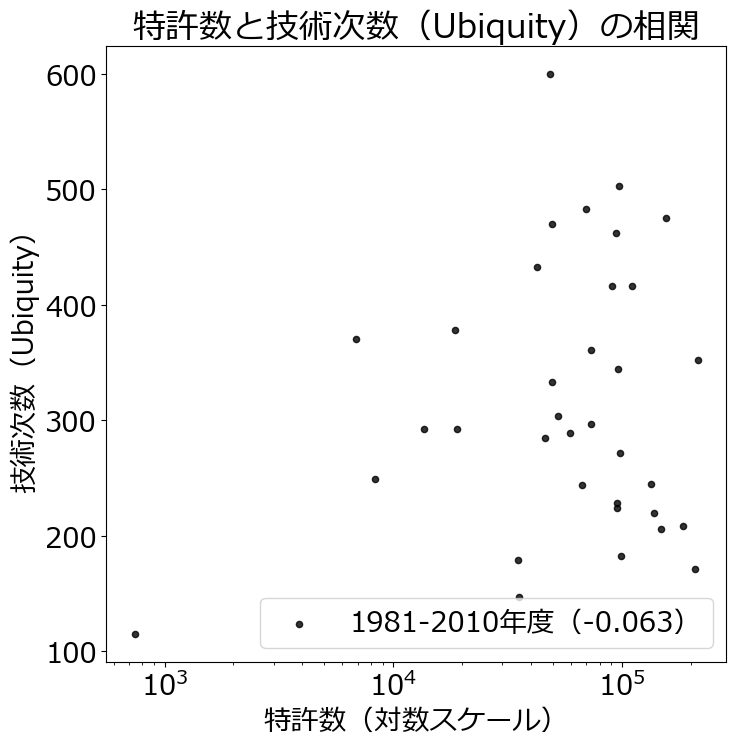

1981-2010 -0.292


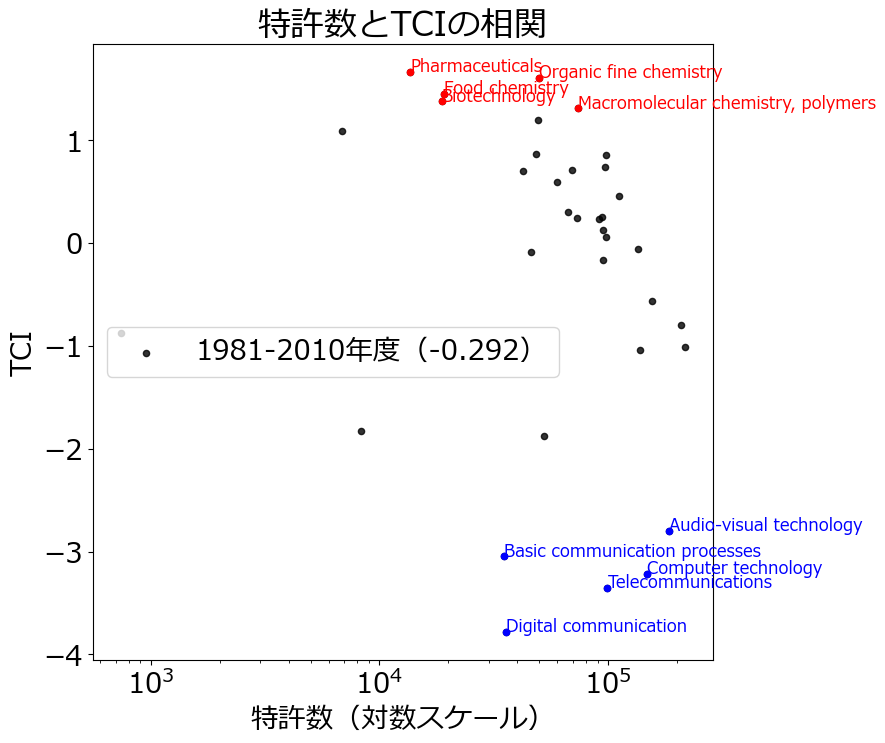

1981-2010 0.59


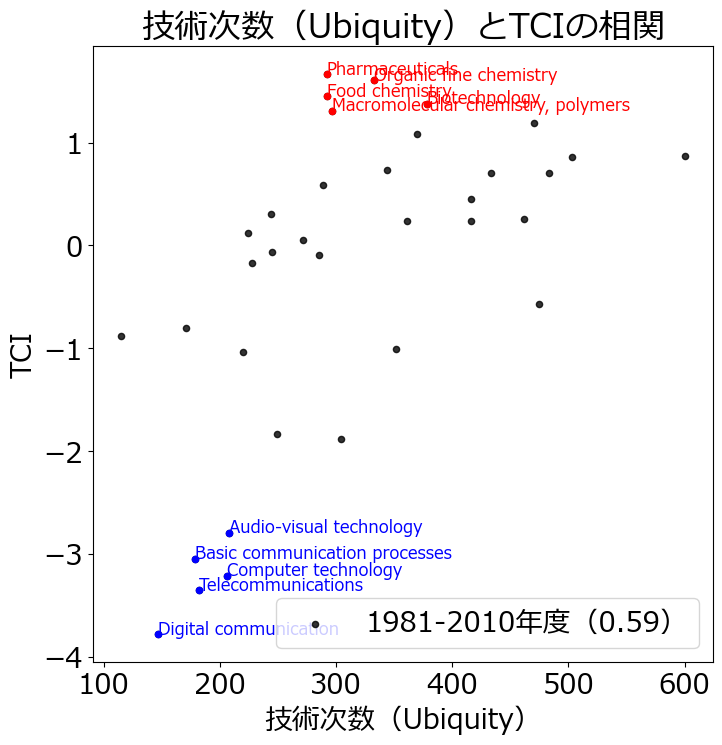

1981-2010 0.055


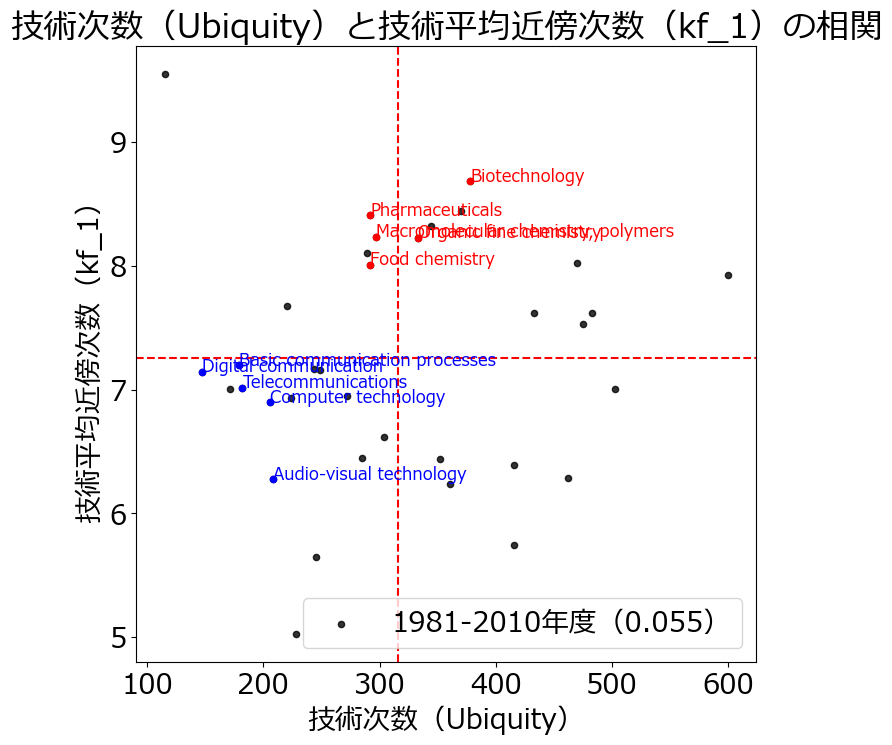

1981-2010 0.149


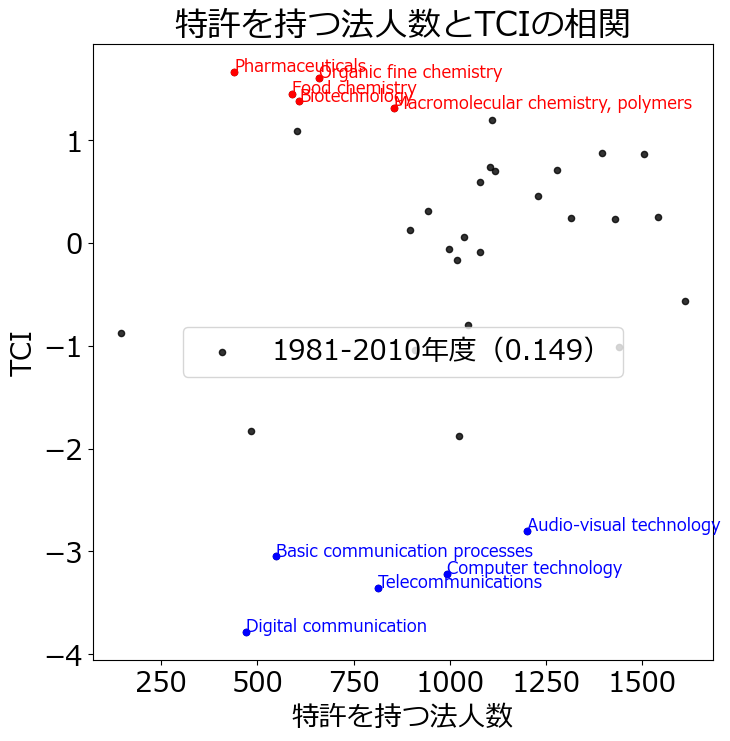

In [ ]:
df_dict = {}
combi_dict = {# ind: [x, y, title, xlabel, ylabel, legend_loc]
              1: ['reg_num', 'ubiquity', '特許数と技術次数（Ubiquity）の相関', '特許数（対数スケール）', '技術次数（Ubiquity）', 'lower right'], 
              2: ['reg_num', 'tci', '特許数とTCIの相関', '特許数（対数スケール）', 'TCI', 'center left'], 
              3: ['ubiquity', 'tci', '技術次数（Ubiquity）とTCIの相関', '技術次数（Ubiquity）', 'TCI', 'lower right'], 
              4: ['ubiquity', 'ki_1', '技術次数（Ubiquity）と技術平均近傍次数（kf_1）の相関', '技術次数（Ubiquity）', '技術平均近傍次数（kf_1）', 'lower right'], 
              5: ['right_person_name', 'tci', '特許を持つ法人数とTCIの相関', '特許を持つ法人数', 'TCI', 'center']
              }

for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    period = f'{year_start}-{year_end}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period][combi[0]].corr(df[df[f'{ar}_{year_style}_period']==period][combi[1]]), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period][combi[0]], 
                df[df[f'{ar}_{year_style}_period']==period][combi[1]], s=20, 
                alpha=0.8, label=f'{period}年度（{corr_num}）', color='black')
    if i == 4:
        ax.axvline(x=df[df[f'{ar}_{year_style}_period']==period][combi[0]].mean(), color='red', linestyle='--')
        ax.axhline(y=df[df[f'{ar}_{year_style}_period']==period][combi[1]].mean(), color='red', linestyle='--')
    ax.set_title(combi[2])
    if combi[0] in ['reg_num']: ax.set_xscale('log')
    if combi[1] in ['reg_num']: ax.set_yscale('log')
    x_min = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].min()
    x_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].nsmallest(2).iloc[1]
    y_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[1]].nsmallest(2).iloc[1]
    if i in [2, 3, 4, 5]: 
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)][combi[0]].values[0]-1,
        #         y_2smallest-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        for i, row in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).reset_index(drop=True).iterrows():
            
        #     # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[25:51,:]['right_person_name'].values:
        #     #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='orange')
        #     #     if i+1!=51: ax.scatter(row[combi[0]], row[combi[1]], s=20, color='orange')
        #     # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[51:76,:]['right_person_name'].values:
        #     #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='green')
        #     #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color='green')
        #     if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).tail(25)['right_person_name'].values:
        #         ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=10, color='blue')
        #         ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
            if row['schmoch35'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).head(5)['schmoch35'].values:
                ax.text(row[combi[0]], row[combi[1]], row['schmoch35'], fontsize=12, color='red')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='red')
            if row['schmoch35'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).tail(5)['schmoch35'].values:
                # display(row)
                ax.text(row[combi[0]], row[combi[1]], row['schmoch35'], fontsize=12, color='blue')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
    # if i == 3:
    #     for i, row in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).reset_index(drop=True).iterrows():
    #         if row['schmoch35'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).tail(15)['schmoch35'].values:
    #             ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=10, color='blue')
    #             ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
        
    ax.set_ylabel(combi[4])
    ax.set_xlabel(combi[3])
    ax.legend(loc=combi[5], fontsize=20)
    plt.show()
    

C:\Users\rin\AppData\Local\Temp\ipykernel_2940\1154759958.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plot_df.index, fontsize=15)
C:\Users\rin\AppData\Local\Temp\ipykernel_2940\1154759958.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([x for x in range(0, 80000+1, 20000)], fontsize=20, rotation=90)
C:\Users\rin\AppData\Local\Temp\ipykernel_2940\1154759958.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  xax2.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=20, rotation=90)
C:\Users\rin\AppData\Local\Temp\ipykernel_2940\1154759958.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plot_df.index, fontsize=15)
C:\Users\rin\AppData\Local\Temp\ipykernel_2940\1154759958.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([x for x in ran

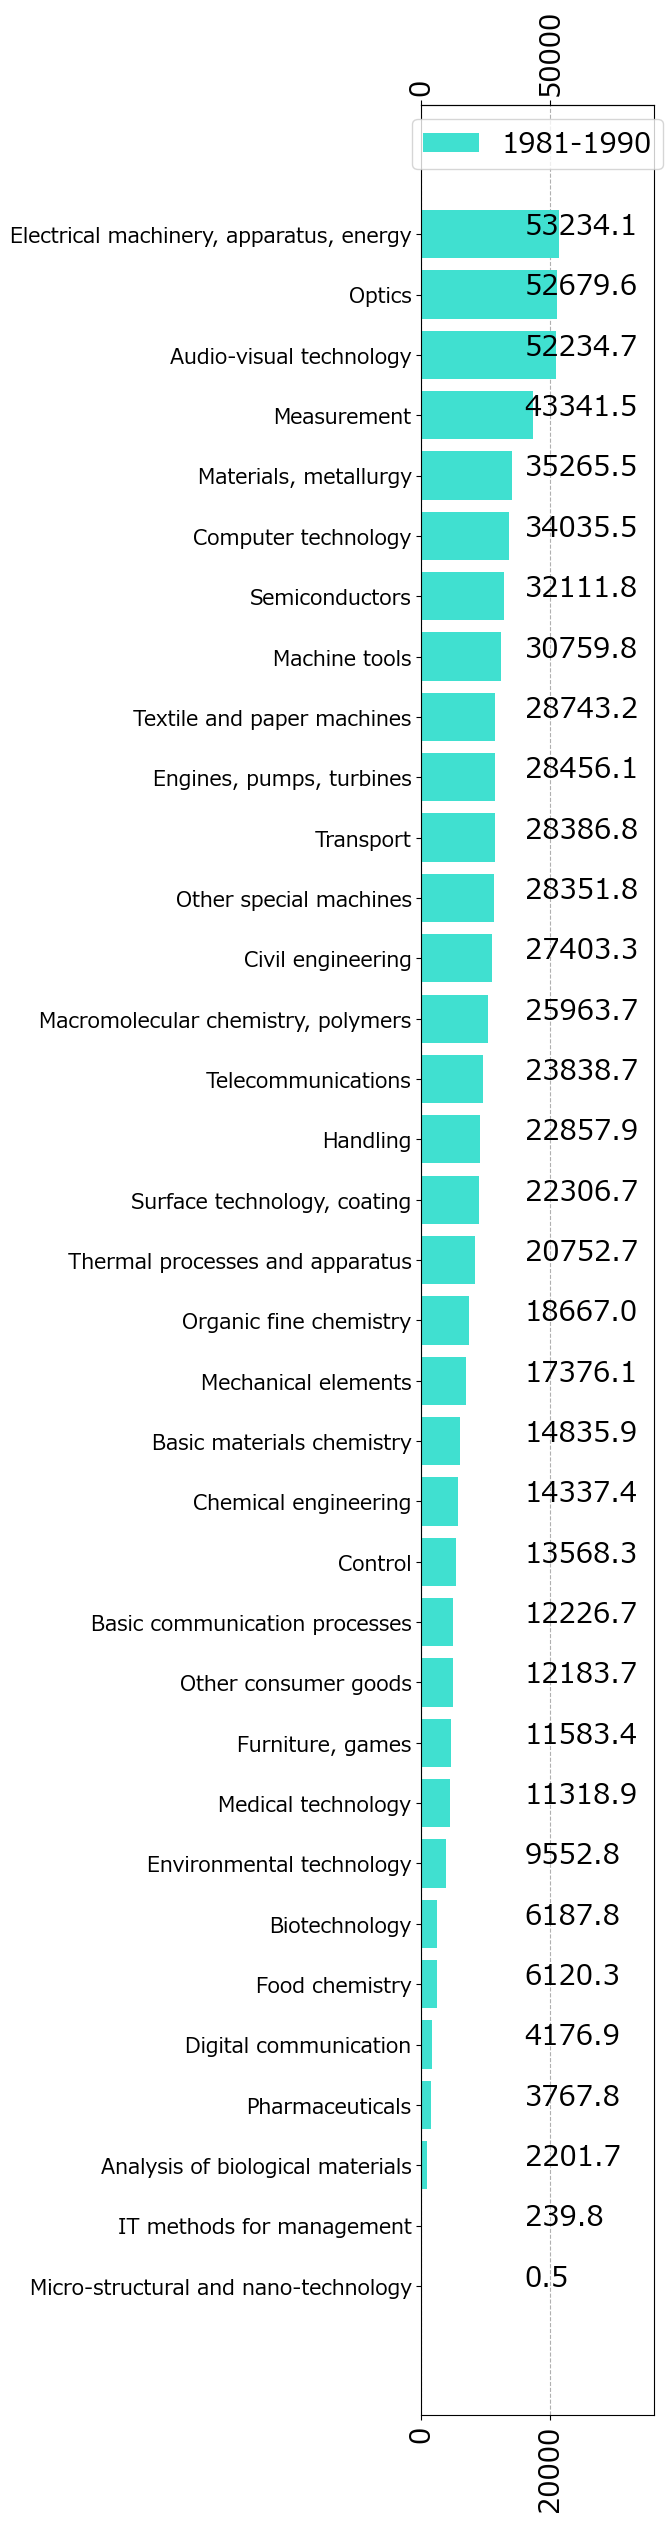

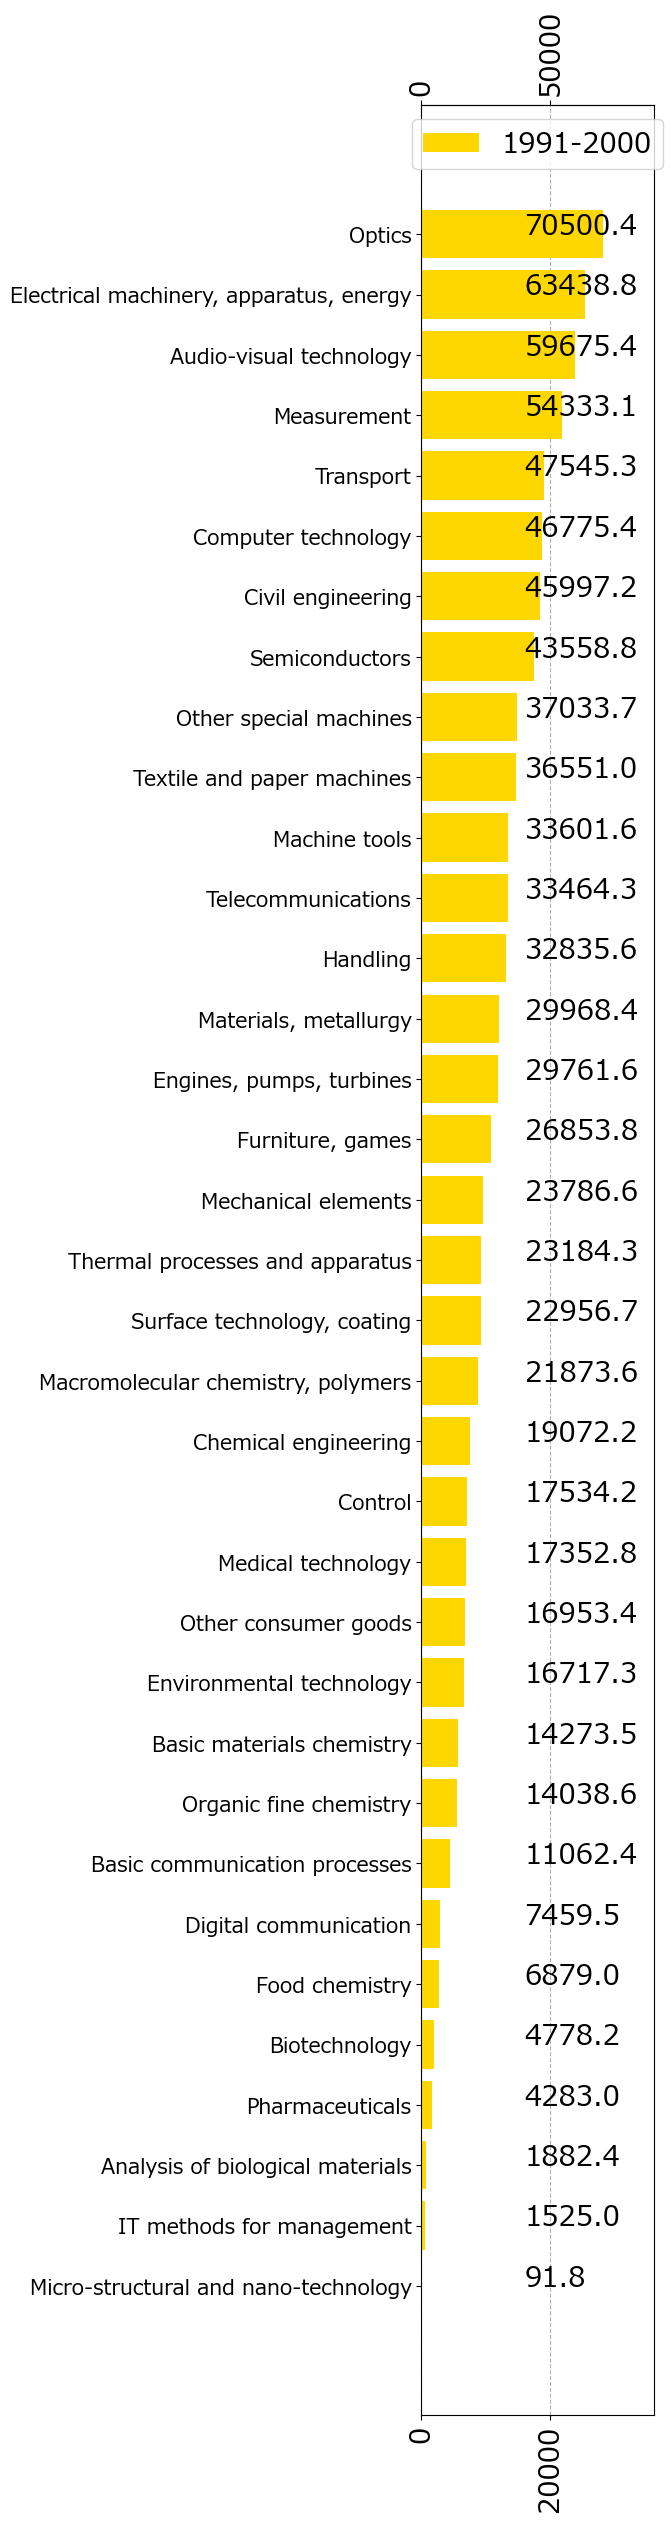

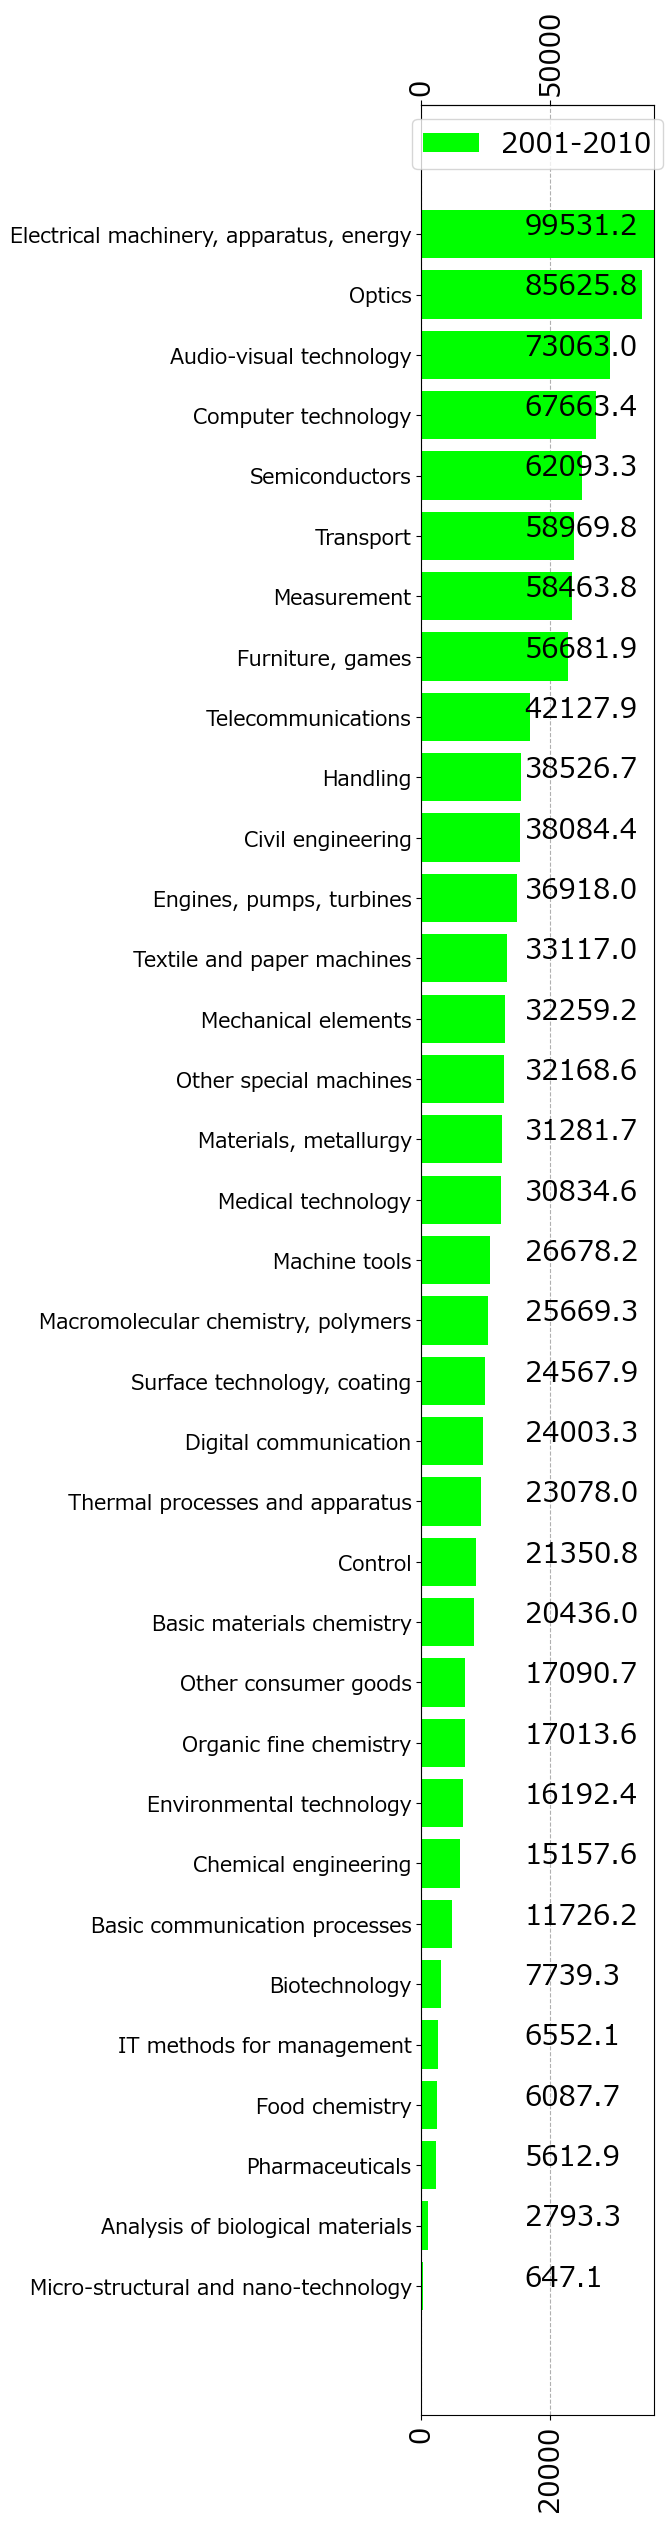

In [ ]:
# fig, ax = plt.subplots(figsize=(20, 40), squeeze=False, sharey=False)
color_count = 0
for period in range(year_start, year_end+1, year_range):
     fig, ax = plt.subplots(figsize=(3, 30))
     period = f'{period}-{period+year_range-1}'
     plot_df = df[df[f'{ar}_{year_style}_period'] == period].groupby([classification])[['reg_num']].sum().sort_values('reg_num', ascending=True)
     ax.barh(list(plot_df.index), list(plot_df['reg_num'].values), color=color_list[color_count], label=period)
     ax.set_yticklabels(plot_df.index, fontsize=15)
     ax.set_xticklabels([x for x in range(0, 80000+1, 20000)], fontsize=20, rotation=90)
     ax.set_xlim(0, 90000)
     # ax.set_xticklabels(fontsize=15, rotation=90)
     xax2 = ax.secondary_xaxis('top')
     # xax2.xaxis.set_major_formatter(ptick.FuncFormatter(lambda x, _: f'{int(x):,}'))
     xax2.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=20, rotation=90)
     xax2.set_xlim(ax.get_xlim())
     ax.legend(fontsize=20, loc='upper center')
     ax.set_axisbelow(True)
     ax.grid(which='major', axis='x', linestyle='--')
     c_i = 0
     for c in plot_df.index:
          reg_num = plot_df[plot_df.index==c]['reg_num'].values[0]
          ax.text(x=40000, y=c_i, s=round(reg_num, 1), fontsize=20, color='black')
     #     ax.set_xticklabels(df[df[f'{ar}_{year_style}_period'] == period].groupby([classification])['reg_num'].sum().index, rotation=90, fontsize=15)
          c_i += 1
     color_count += 1
     # fig.savefig(f'{output_dir}{ar}_{year_style}_{classification}_{period}.png', bbox_inches='tight')
plt.show()

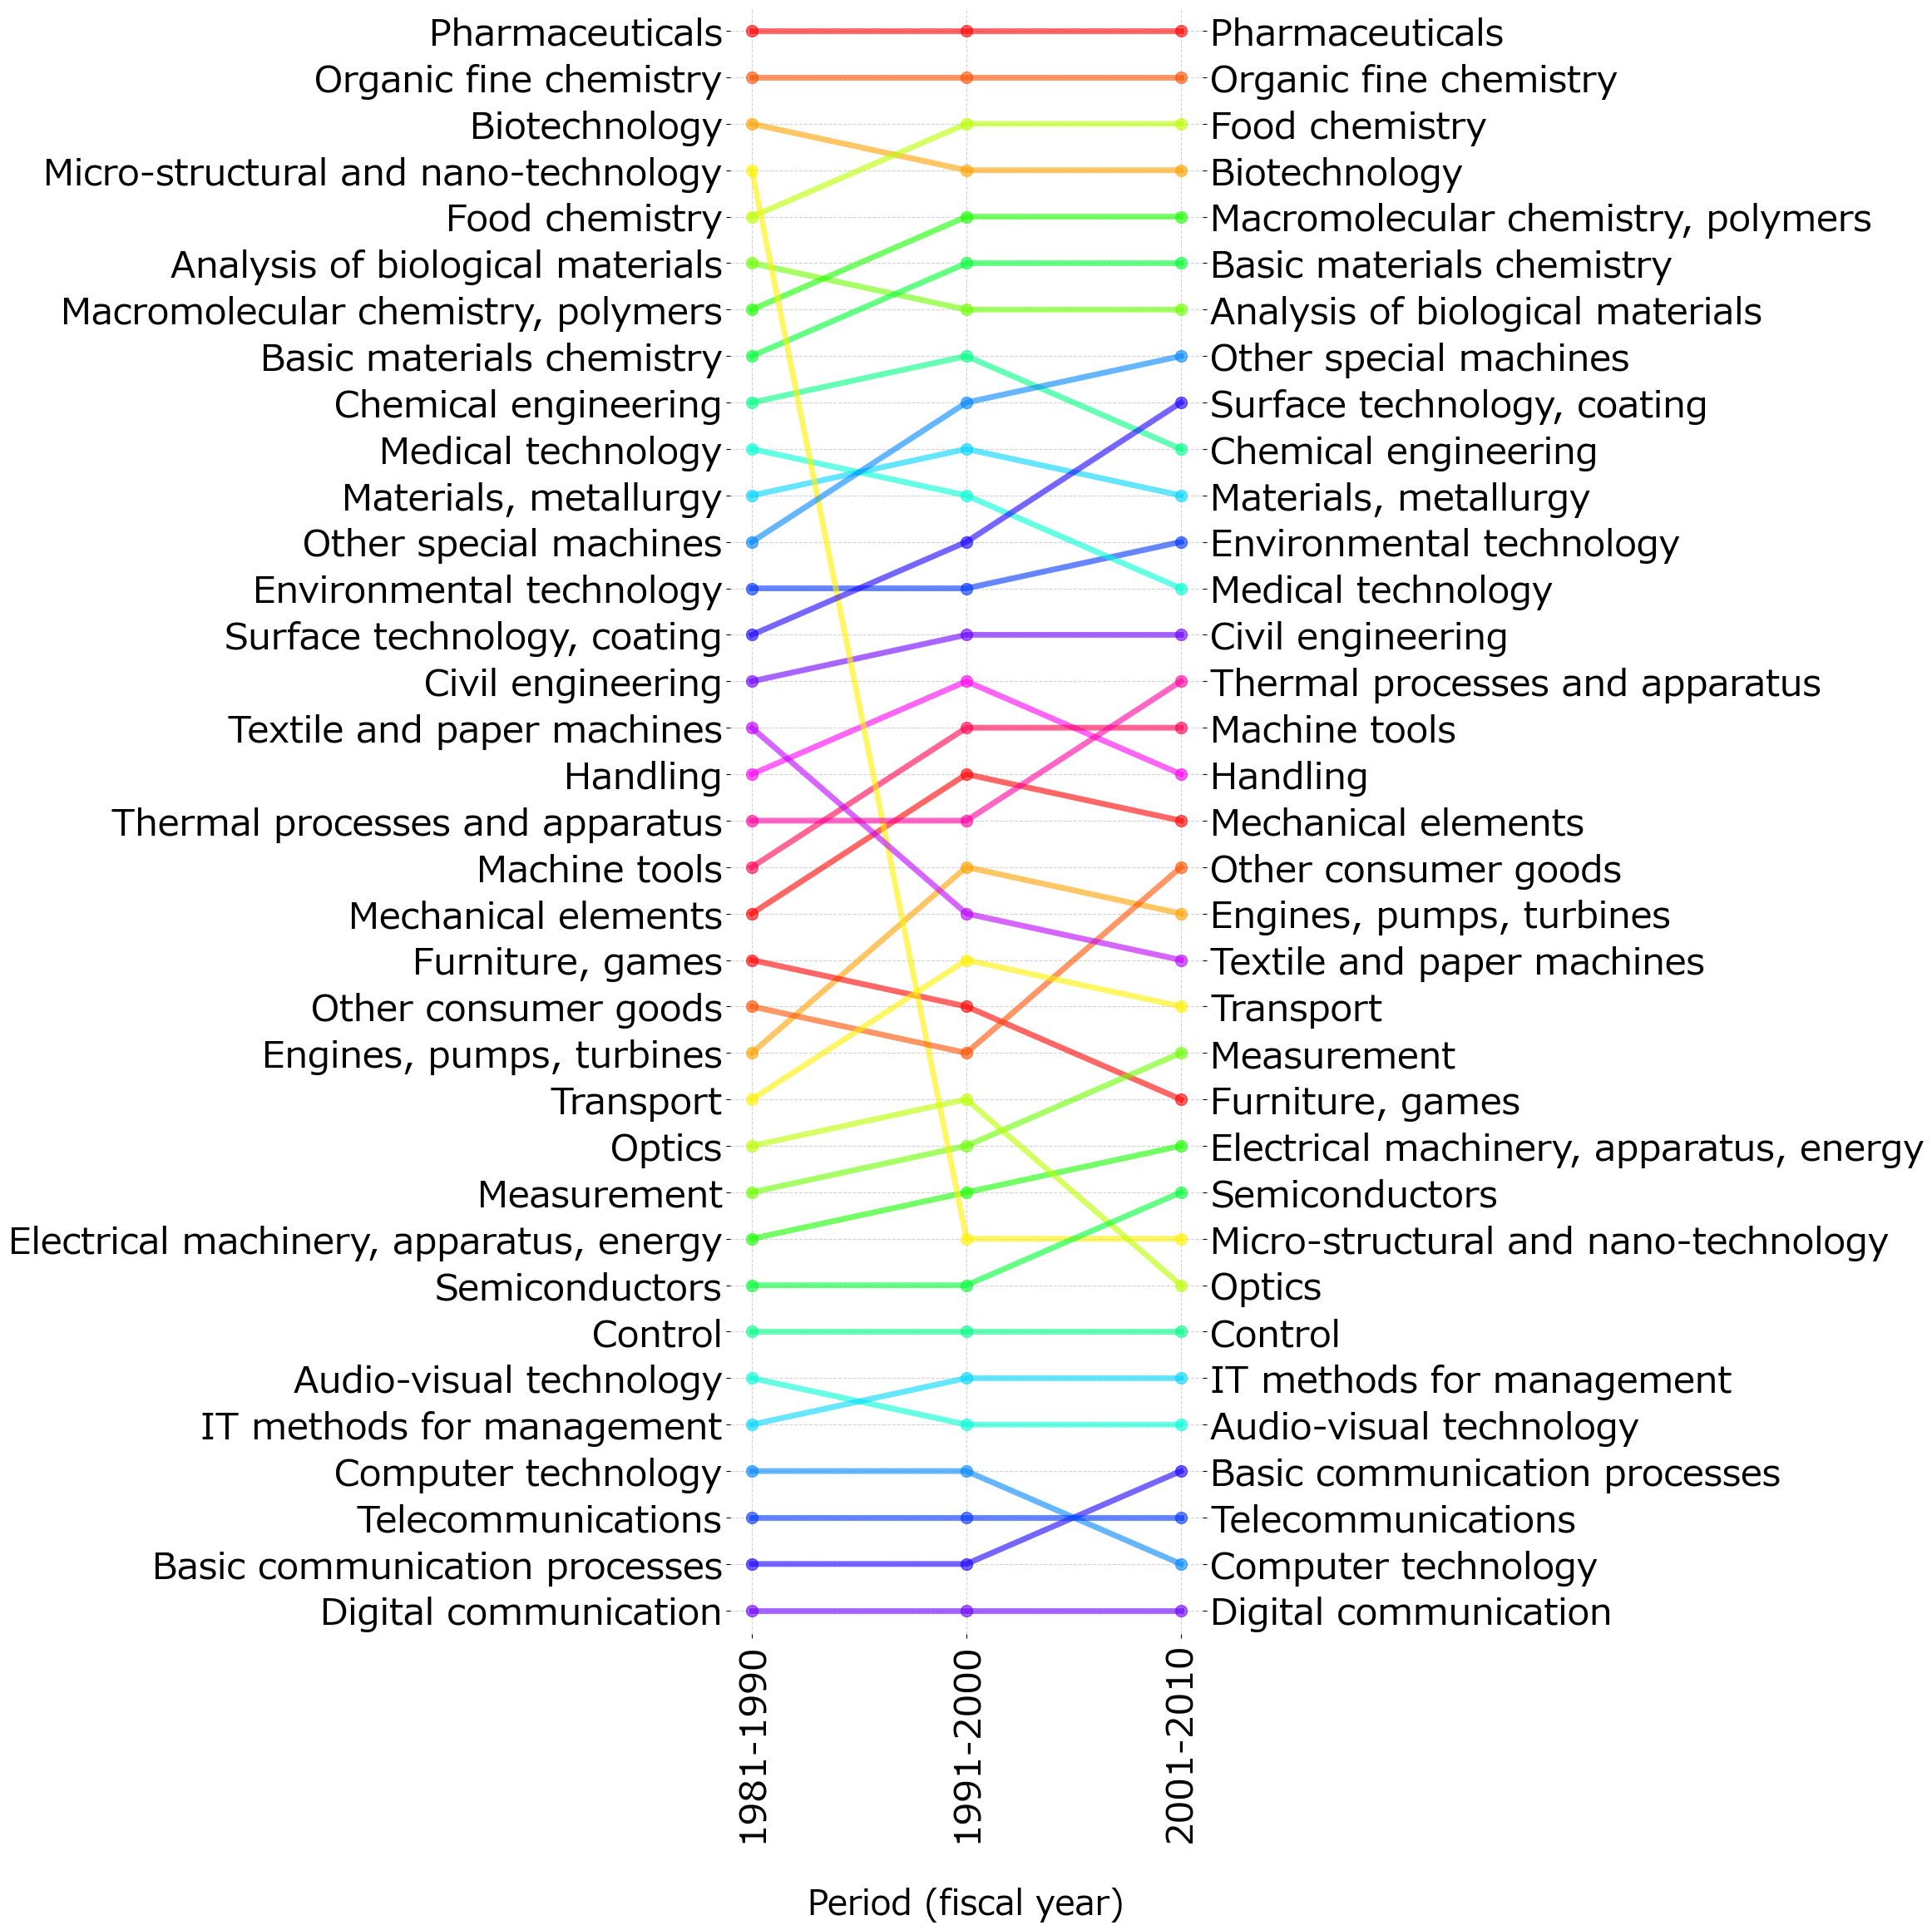

In [ ]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'Ubiquity', f'特許権者次数(=Ubiquity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=Ubiquity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 2: ['right_person_name', 'Ubiquity', f'特許権者次数(=Ubiquity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   5: [classification, 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
            #   5: [classification, 'ubiquity', f'', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
            #   8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              8: [classification, 'tci', '', False]
              }


for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        # display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (24, 24)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=35,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 32, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    # plt.tight_layout()
    plt.xlabel('\nPeriod (fiscal year)', fontsize=30)
    plt.savefig(f'{output_dir}/figures/{combi[1]}_{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.png', bbox_inches="tight")
    plt.show()


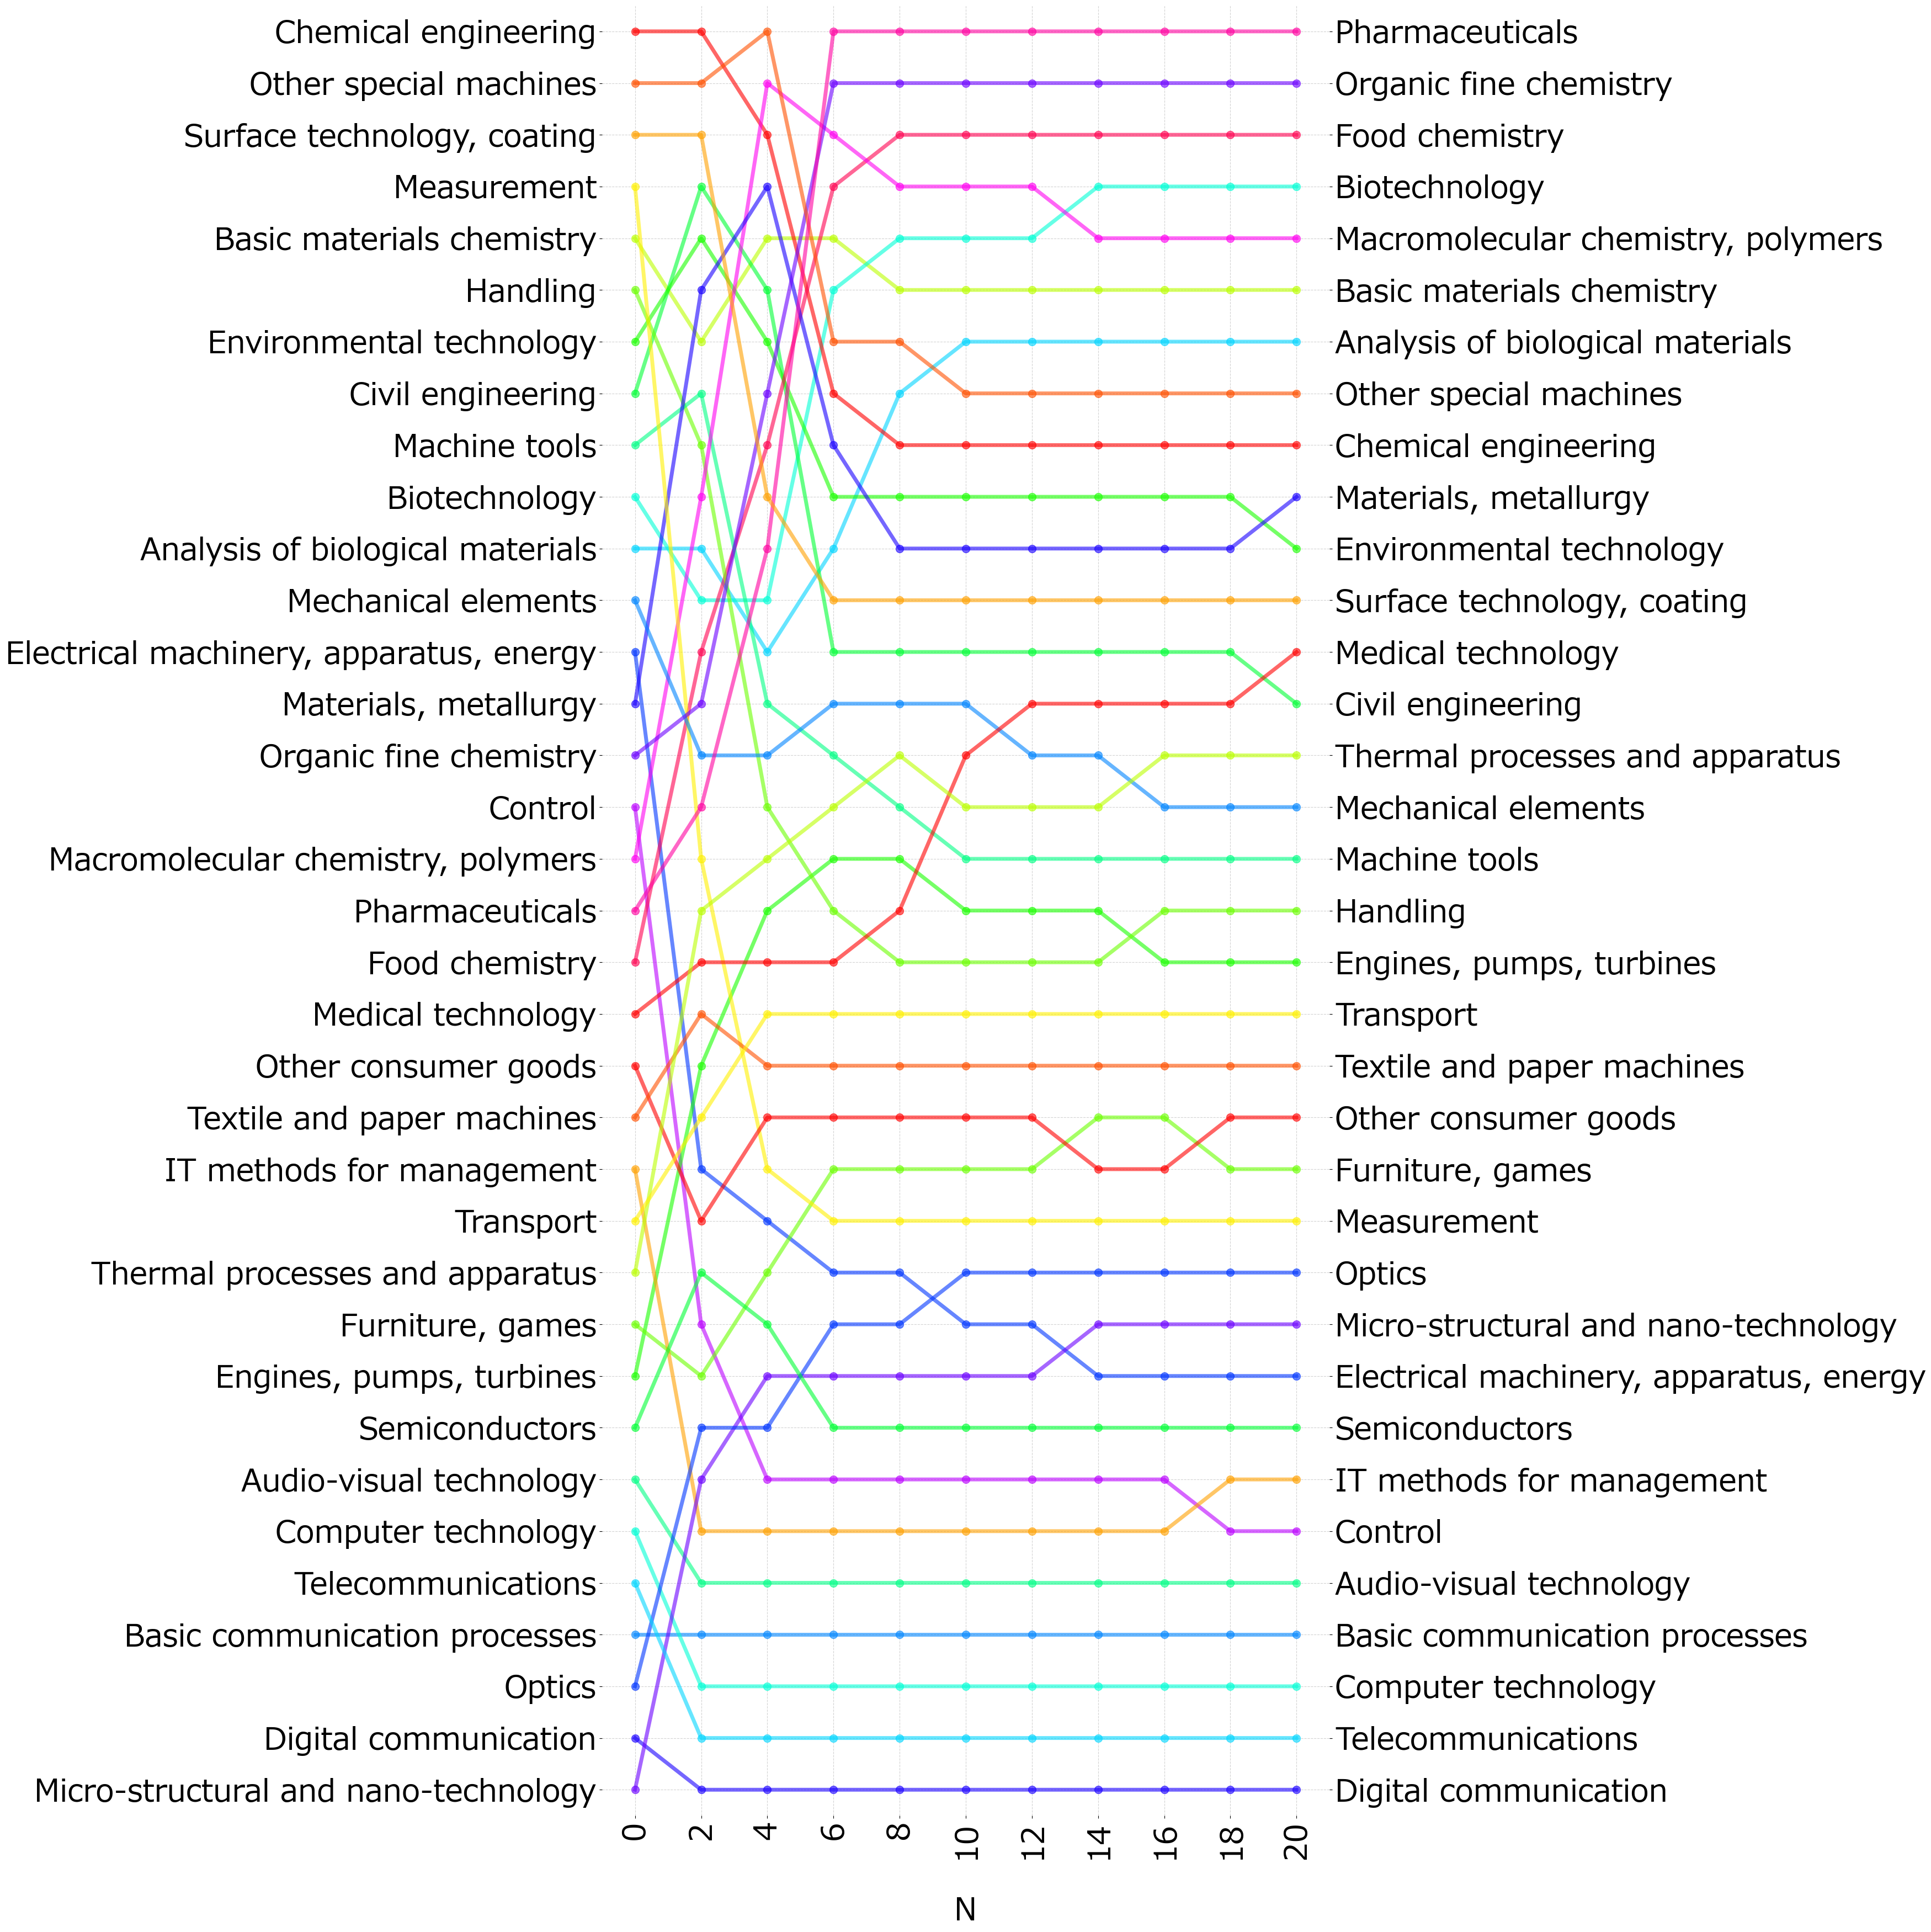

In [ ]:
sample_df = df[(df[f'{ar}_{year_style}_period']==f'{year_start}-{year_end}')].sort_values('tci', ascending=False).copy()
sample_df_dict = {'0': sample_df.melt(id_vars=[classification], value_vars=['ubiquity']).sort_values('value', ascending=False)}
fs = (36, 36)
for i in range(2, 20+1, 2):
    sample_df_dict[f'{i}'] = sample_df.melt(id_vars=[classification], value_vars=[f'ki_{i}']).sort_values('value', ascending=False)
    # if i >= 12: display(sample_df_dict[f'{i}'].head(10))
sample = vr.rank_doubleaxis(sample_df_dict, 
            version='kci', 
                rank_num=35,
                member_col=classification, 
                num_col='value',
                prop_dict={
                    'figsize': fs,
                    'xlabel': 'N',
                    'ylabel': '',
                    'title': '',
                    'fontsize': 40, 
                    'year_range': 2, 
                    'ascending': False, 
                    # 'color': color_dict
                    'color': 'default'
                })